# Your name: Silvia Ji
## Assignment Name: CA01 - Data Cleaning and Exploration of India Air Quality

# Program Inititialization Section
## Enter your import packages here

In [485]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Data File Reading Section
## Write code to read in data from external sources here

In [486]:
data = pd.read_csv('data.csv', encoding = 'latin1') # Fixing encoding error

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
#### Steps:
#### 1. Statistical Description of data (data.describe)
#### 2. Display number of total rows and columns of the dataset (data.shape)
#### 3. Display number of non-null values for each column (data.count)
#### 4. Display number of null values for each column (sum of data.isnull)
#### 5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
#### 6. Display Top 10 and Bottom 10 records (head and tail)

In [487]:
# 1. Statistical Description of data (data.describe)
data.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [488]:
# 2. Display number of total rows and columns of the dataset (data.shape)
data.shape

(435742, 13)

In [489]:
# 3. Display number of non-null values for each column (data.count)
data.count()

stn_code                       291665
sampling_date                  435739
state                          435742
location                       435739
agency                         286261
type                           430349
so2                            401096
no2                            419509
rspm                           395520
spm                            198355
location_monitoring_station    408251
pm2_5                            9314
date                           435735
dtype: int64

In [490]:
# 4. Display number of null values for each column (sum of data.isnull)
data.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [491]:
# 5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [492]:
# 6. Display Top 10 and Bottom 10 records (head and tail)
data.head(10)
data.tail(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435732,SAMP,09-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,145.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-09
435733,SAMP,12-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,34.0,61.0,161.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-12
435734,SAMP,15-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-15
435735,SAMP,18-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-18
435736,SAMP,21-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-21
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleansing the dataset
### Dropping of less valued columns:
1. stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.

2. Dropping rows where no date is available.

In [493]:
# Cleaning up the data

data = data.drop(['stn_code', 'agency', 'sampling_date','location_monitoring_station'], axis=1)


# dropping rows where no date is available

data = data.dropna(subset=['date'])
data

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...
435734,West Bengal,ULUBERIA,RIRUO,20.0,44.0,148.0,NaN,NaN,2015-12-15
435735,West Bengal,ULUBERIA,RIRUO,17.0,44.0,131.0,NaN,NaN,2015-12-18
435736,West Bengal,ULUBERIA,RIRUO,18.0,45.0,140.0,NaN,NaN,2015-12-21
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN,NaN,2015-12-24


In [494]:
# displaying final columns (data.columns)

data.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'date'],
      dtype='object')

### Changing the types to uniform format:

Notice that the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’ — both actually mean the same, so let’s remove such type of stuff and make it uniform. Replace the 'type' values with standard codes as follows:

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)

In [495]:
data.type = data.type.replace({"Residential": "R", "Residential and others": "RO", "Residential, Rural and other Areas": "RRO", "Industrial Area": "I", "Industrial Areas": "I", "Industrial": "I", "Sensitive Area": "S", "Sensitive Areas": "S", "Sensitive": "S", np.nan: "RRO" })

In [496]:
# Display top 10 records after codification of 'types'
data.head(10)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01
5,Andhra Pradesh,Hyderabad,RRO,6.4,25.7,NaN,NaN,NaN,1990-03-01
6,Andhra Pradesh,Hyderabad,RRO,5.4,17.1,NaN,NaN,NaN,1990-04-01
7,Andhra Pradesh,Hyderabad,I,4.7,8.7,NaN,NaN,NaN,1990-04-01
8,Andhra Pradesh,Hyderabad,RRO,4.2,23.0,NaN,NaN,NaN,1990-04-01
9,Andhra Pradesh,Hyderabad,I,4.0,8.9,NaN,NaN,NaN,1990-05-01


### Creating a year column
To view the trend over a period of time, we need year values for each row and also when you see in most of the values in date column only has ‘year’ value. So, let’s create a new column holding year values. Convert the column to 'datetime' type and extract the year to populate the new column. Display Top 5 records after the conversion.

In [497]:
data.date = pd.to_datetime(data.date)
data.info()

data['year'] = data.date.dt.year

data.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435735 entries, 0 to 435738
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   state     435735 non-null  object        
 1   location  435735 non-null  object        
 2   type      435735 non-null  object        
 3   so2       401092 non-null  float64       
 4   no2       419505 non-null  float64       
 5   rspm      395516 non-null  float64       
 6   spm       198355 non-null  float64       
 7   pm2_5     9314 non-null    float64       
 8   date      435735 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 33.2+ MB


,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


### Handling Missing Values

The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction.
We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [498]:
# define columns of importance, which shall be used reguarly (COLS = ....)
COLS = 'so2', 'no2', 'rspm', 'spm', 'pm2_5'

# invoke SimpleImputer to fill missing values using 'mean' as the replacement strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data[['so2', 'no2', 'rspm', 'spm', 'pm2_5']] = imputer.fit_transform(data[['so2', 'no2', 'rspm', 'spm', 'pm2_5']])

# Display data.info after the transformation
data.info()

# Display that there are no more missing values in the dataset
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435735 entries, 0 to 435738
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   state     435735 non-null  object        
 1   location  435735 non-null  object        
 2   type      435735 non-null  object        
 3   so2       435735 non-null  float64       
 4   no2       435735 non-null  float64       
 5   rspm      435735 non-null  float64       
 6   spm       435735 non-null  float64       
 7   pm2_5     435735 non-null  float64       
 8   date      435735 non-null  datetime64[ns]
 9   year      435735 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 36.6+ MB


state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
date        0
year        0
dtype: int64

## Statewise Grouping of so2, no2, rspm, spm values

Calculate median values of so2, no2, rspm, spm for each state and display in (a) as table (b) bar chart, with values sorted in ascending order. Separate section for each of the component. Use matplotlib().

### so2 status

In [499]:
# Group by state
so2 = data.groupby('state')['so2'].median().sort_values(ascending=True)

# Display as table
display(pd.DataFrame(so2))

,so2
state,
Nagaland,2.000000
Mizoram,2.000000
Meghalaya,2.000000
Arunachal Pradesh,2.500000
Himachal Pradesh,3.000000
Kerala,4.200000
Telangana,5.000000
Odisha,5.000000
Jammu & Kashmir,5.000000


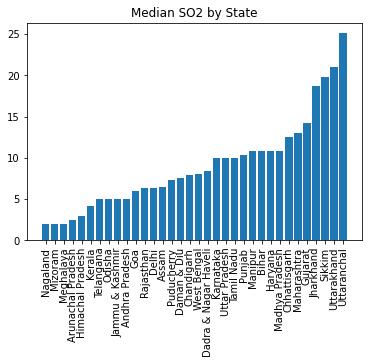

In [500]:
# Display as bar chart
plt.bar(so2.index, so2)
plt.title("Median SO2 by State")
plt.xticks(rotation=90)
plt.show()

### no2 status

In [501]:
# Group by state
no2 = data.groupby('state')['no2'].median().sort_values(ascending=True)

# Display as table
display(pd.DataFrame(no2))

,no2
state,
Arunachal Pradesh,5.000000
Mizoram,5.000000
Nagaland,7.000000
Meghalaya,10.000000
Goa,11.600000
Puducherry,13.000000
Jammu & Kashmir,13.000000
Himachal Pradesh,13.900000
Kerala,14.000000


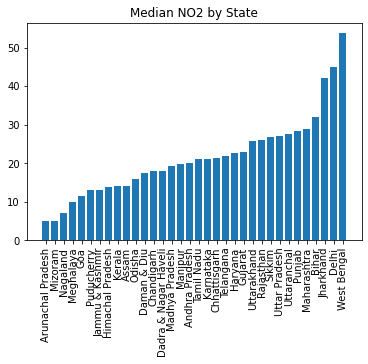

In [502]:
# Display as bar chart
plt.bar(no2.index, no2)
plt.title("Median NO2 by State")
plt.xticks(rotation=90)
plt.show()

### rspm status

In [621]:
# Group by state
rspm = data.groupby('state')['rspm'].median().sort_values(ascending=True)

# Display as table
display(pd.DataFrame(rspm))

,rspm
state,
Sikkim,32.000000
Mizoram,40.000000
Puducherry,46.000000
Kerala,49.000000
Goa,56.000000
Meghalaya,57.000000
Tamil Nadu,59.000000
Manipur,61.000000
Karnataka,63.000000


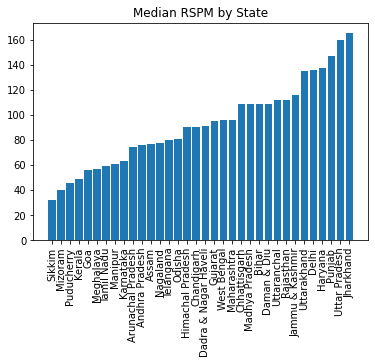

In [504]:
# Display as bar chart
plt.bar(rspm.index, rspm)
plt.title("Median RSPM by State")
plt.xticks(rotation=90)
plt.show()

### spm status

In [505]:
# Group by state
spm = data.groupby('state')['spm'].median().sort_values(ascending=True)

# Display as table
display(pd.DataFrame(spm))

,spm
state,
Sikkim,75.00000
Manipur,120.50000
Puducherry,191.00000
Goa,199.00000
Daman & Diu,200.50000
Andhra Pradesh,220.78348
Meghalaya,220.78348
Mizoram,220.78348
Nagaland,220.78348


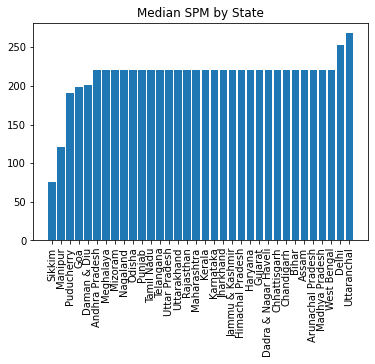

In [506]:
# Display as bar chart
plt.bar(spm.index, spm)
plt.title("Median SPM by State")
plt.xticks(rotation=90)
plt.show()

### What is the yearly trend in a particular state, say ‘Andhra Pradesh’?

Create a new dataframe containing the NO2, SO2, rspm, and spm data regarding state ‘Andhra Pradesh’ only and group it by ‘year’. Display top 5 records after.

In [534]:
AP = data[['year','no2','so2','rspm','spm']].loc[data.state=='Andhra Pradesh'].groupby('year').median()
AP.head(5)

,no2,so2,rspm,spm
year,,,,
1990,13.6,5.60,108.833091,179.00000
1991,12.8,8.25,108.833091,141.50000
1992,27.6,12.40,108.833091,192.00000
1993,11.4,6.00,108.833091,220.78348
1994,14.2,8.70,108.833091,220.78348


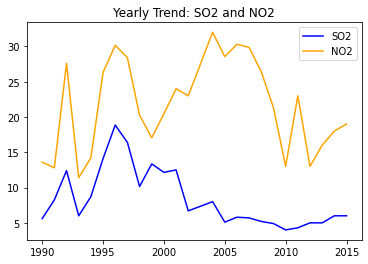

In [612]:
# Display yearly trend graph (year vs. value) in pairs: (a) so2 and no2 (b) rspm and spm. 
# So, you will display TWO graphs altogether.

# (a) so2 and no2
plt.plot(AP.index, AP.so2, color='blue', label = 'SO2')
plt.plot(AP.index, AP.no2, color='orange', label = 'NO2')
plt.title('Yearly Trend: SO2 and NO2')
plt.legend()
plt.show()

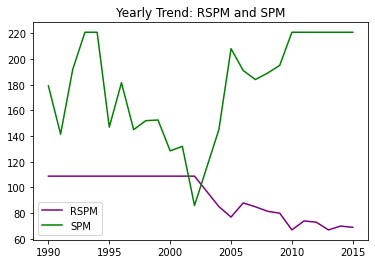

In [613]:
# (b) rspm and spm
plt.plot(AP.index, AP.rspm, color='purple', label = 'RSPM')
plt.plot(AP.index, AP.spm, color='green', label = 'SPM')
plt.title('Yearly Trend: RSPM and SPM')
plt.legend()
plt.show()

Do you find anythumg alarming? Explain what you can conclude from this Exploratory Data Analysis for the State of Andhra Pradesh. Enter your answer here .....



The analysis found that the median air quality from 1990-2015 in the state of Andhra Pradesh was overall better than the mean air quality in all of India during the same time period.

Andhra Pradesh has median Sulphur Dioxide (SO2) and Nitrogen Dioxide levels of 5 μg each, and Respirable Suspended Particulate Matter (RSPM) of 76 μg, which are all lower than the national averages of 10.8 μg, 25.8 μg, and 108.8 μg, respectively.

However, Andhra Pradesh's median Suspended Particulate Matter (SPM) of 220.8 μg is the same as than the national average. 

Based on the first graph, levels of both SO2 and NO2 have gone down since the 1990s and early 2000s. However, NO2 levels are considerably higher than SO2 levels. NO2 is often caused by road traffic and energy prodcution, and can lead to human respiratory illnesses.

The secong graph indicates that RSPM levels have steadily decreased since the early 2000s. However, SPM levels have fluctuated since 1990, often reaching high levels, and have plateaued at a new high since 2010. High levels of SPM levels can have adverse respiratory and cardiovascular effects.

In conclusion, I recommend that the state of Andhra Pradesh closely monitor and make an effort to decrease NO2 and SPM levels.